## Assignment task:

 Write a colab to illustrate how dimensionality reduction technique like umap can be used followed by clustering as well as a classification feature extraction technique

# 1. Import Necessary Libraries

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=01666081e777eb7493a489cd225f29a9ba98857ec5e0e9dacc5eaed7a637be53
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import umap

# Load the dataset
df = pd.read_csv('/content/Spotify-2000.csv')
print(df.head())


   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

# 2. Data Preprocessing

In [4]:
# Data preprocessing steps
# - Handle missing values if any
# - Encode categorical variables if necessary
# - Normalize/standardize the data

# Example: Standardizing numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))


# 3. Dimensionality Reduction with UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


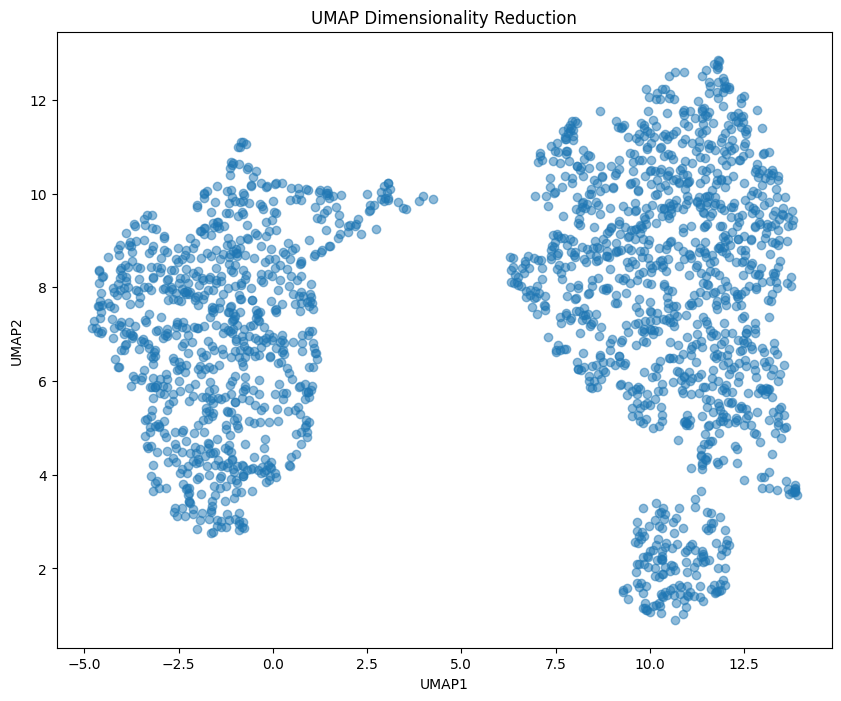

In [5]:
# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
umap_results = umap_model.fit_transform(df_scaled)

# Plot UMAP results
plt.figure(figsize=(10, 8))
plt.scatter(umap_results[:, 0], umap_results[:, 1], alpha=0.5)
plt.title('UMAP Dimensionality Reduction')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


# 4. Clustering with KMeans

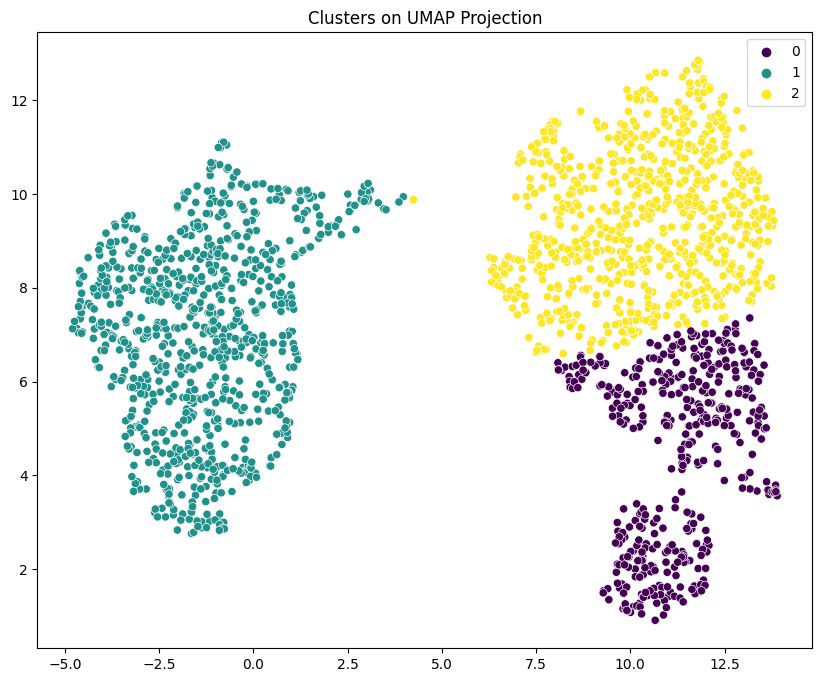

In [13]:
# Perform clustering on the UMAP results with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10)  # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(umap_results)

# Plot the clusters using the corrected sns.scatterplot syntax
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_results[:, 0], y=umap_results[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters on UMAP Projection')
plt.show()


# 5. Classification

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(umap_results, cluster_labels, test_size=0.3, random_state=42)

# Train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions and evaluate the classifier
y_pred = classifier.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       251
           2       1.00      1.00      1.00       221

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599

